In [1]:
% matplotlib inline
from rlpy.CustomDomains import RCSegment

In [2]:
testCar = RCSegment(rewardfile="reward.p")
testCar.s0()

(array([ 0.,  0.,  0.,  0.]), False, array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

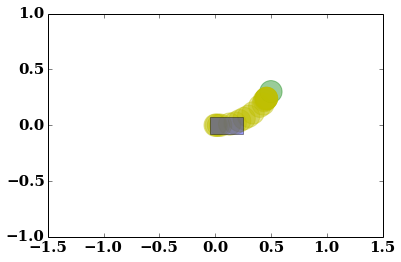

In [3]:
% matplotlib inline
testCar.show_inline()

Segmented [ 0.    0.    0.03  0.  ] [[ 0.    0.    0.03  0.  ]
 [ 0.01  0.    0.06  0.02]
 [ 0.03  0.    0.09  0.05]
 [ 0.05  0.    0.12  0.1 ]
 [ 0.13  0.01  0.15  0.26]
 [ 0.18  0.02  0.15  0.35]
 [ 0.22  0.04  0.15  0.43]
 [ 0.26  0.06  0.15  0.52]
 [ 0.3   0.08  0.15  0.61]
 [ 0.34  0.11  0.15  0.69]
 [ 0.4   0.17  0.12  0.87]
 [ 0.43  0.19  0.09  0.94]
 [ 0.44  0.22  0.06  0.99]
 [ 0.45  0.23  0.03  1.02]
 [ 0.46  0.24  0.    1.04]
 [ 0.46  0.24  0.    1.04]
 [ 0.46  0.24  0.    1.04]
 [ 0.46  0.24  0.    1.04]]
Segmented [ 0.01  0.    0.06  0.02] [[ 0.01  0.    0.06  0.02]
 [ 0.03  0.    0.09  0.05]
 [ 0.05  0.    0.12  0.1 ]
 [ 0.13  0.01  0.15  0.26]
 [ 0.18  0.02  0.15  0.35]
 [ 0.22  0.04  0.15  0.43]
 [ 0.26  0.06  0.15  0.52]
 [ 0.3   0.08  0.15  0.61]
 [ 0.34  0.11  0.15  0.69]
 [ 0.4   0.17  0.12  0.87]
 [ 0.43  0.19  0.09  0.94]
 [ 0.44  0.22  0.06  0.99]
 [ 0.45  0.23  0.03  1.02]
 [ 0.46  0.24  0.    1.04]
 [ 0.46  0.24  0.    1.04]
 [ 0.46  0.24  0.    1.04]
 [ 0.46  

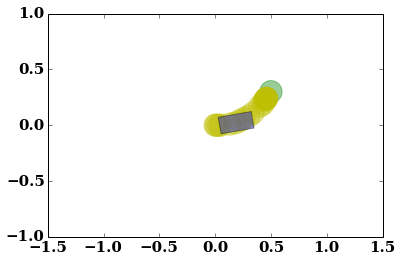

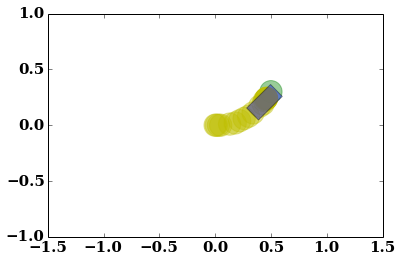

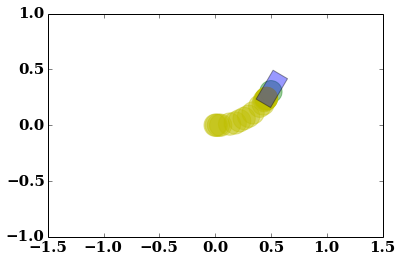

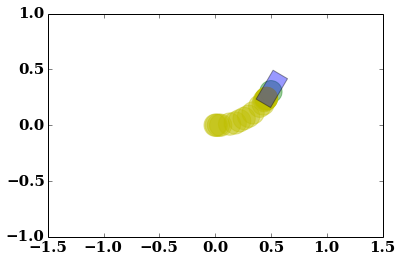

In [4]:
###  B N F
### [0 1 2] - negative angle
### [3 4 5] - neutral angle
### [6 7 8] - positive angle

def go(d, num):
    actions = []
    for i in range(num - 1):
        n = testCar.step(d)
#         actions += [n]
        if n[0] == 0.4:
            print n
    print testCar.step(d)
    testCar.show_inline()
    return actions

REVERSE_R, COAST_R, DRIVE_R = range(3)
REVERSE_, COAST_, DRIVE_ = range(3, 6)
REVERSE_LEFT, COAST_LEFT, DRIVE_LEFT = range(6, 9)

testCar.s0()
actions = []
actions += go(DRIVE_LEFT, 5) 
actions += go(COAST_LEFT, 7)
actions += go(REVERSE_LEFT, 5)
actions += go(COAST_, 5)

# go(DRIVE_, 3)
# go(COAST_LEFT, 18)
# go(REVERSE_LEFT, 3)
# go(COAST_, 1)

# for i in range(5):
#     print testCar.step(DRIVE_)
# testCar.show_inline()
# print "Next"

# for i in range(7):
#     print testCar.step(8)
# for i in range(5):
#     print testCar.step(3)
# testCar.show_inline()
# for i in range(3):
#     print testCar.step(3)
# testCar.show_inline()


In [ ]:
testCar.get_car_corners(testCar.state)

In [ ]:
import numpy as np
x = np.array([a[1] for a in actions])

In [ ]:
y = np.vectorize(lambda n: round(n, 2))

In [ ]:
n = y(x).asList()
print n

In [ ]:
import json

with open("reward.json", "w") as f:
    json.dump(n, f)